# Neural Networks Assignment: Heart Disease Classification 
>**Source:** The dataset was obtained from the [Heart Disease Classification - Neural Network](https://www.kaggle.com/rajeshjnv/heart-disease-classification-neural-network/data) Kaggle Notebook data page. 

### Introduction and Task Details
The goal is to create a classification model that can accurately predict whether a patient will or won't have heart disease based on their recorded health metrics. 

**Contents**
1. [Getting the imports and data](#importing-python-packages-and-the-dataset)
    * [Column names explained](#column-names-explained)
2. [Assessing the quality of the data](#data-quality-assessment)
3. [Preparing the data for analysis](#data-preprocessing)

## Importing Python Packages and the Dataset

In [1]:
import numpy as np 
import numpy.matlib
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns 
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [2]:
heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Column Names Explained

- age = age in years
- sex = male or female (1 = male; 0 = female)
- cp = chest pain type
- trestbps = resting blood pressure (in mm Hg on admission to the hospital)
- chol = serum cholesterol (in mg/dl)
- fbs = fasting blood sugar (&gt; 120 mg/dl, 1 = true; 0 = false)
- restecg = resting electrocardiographic results
- thalach = maximum heart rate achieved
- exang = exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
- slope = the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca = The number of major vessels (0-3)
- thal = A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target = Heart disease (0 = no, 1 = yes)

## Data Quality Assessment

In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.shape

(303, 14)

**Overview of the Data**
- There are no missing/null values
- All data is numerical (everything int except oldpeak which is float)
- There are 303 rows/samples and 14 columns/features
- Age range is from 29 to 77 years with mean age of 54 years (to 2 s.f.).
- Some feature values range between 0 and 1 whilst others between 0 and 100s.

**Considerations**
- As the distributions for each feature are not all gaussian bell curves **and** the dataset contains features with different ranges/varying scales, the dataset requires normalistion. 
- The normalisation will change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 
- Normalisation is being performed so that features with larger ranges won't intrinsicaly have more influence on the results (i.e. what the main predictors are for heart disease) than features with smaller ranges. In other words, we don't want to conflate feature size with feature importance as a predictor.
- The algorithms to be used on this data (artificial neural networks, k-nearest neighbours) do not make assumptions about the data distribution. As such, standardisation is not being used to transform the data (standardisation assumes normally distributed data and requires that the selected algorithms assume normal distribution too e.g. logistic regression).
- One way to normalise the data is to use MinMaxScaler which rescales the data set such that all feature values are in the range [0, 1]. 
- It must be noted however, MinMaxScalar is sensitive to outliers (compared to StandardScaler) because it does not use a bounded range with smaller standard deviations, which would have suppressed the effects of outliers. 
- There are many normalisation techniques to choose from on scikit-learn so it will be important to select the right one for this dataset. [See here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py) for scikit-learn's article "Compare the effect of different scalers on data with outliers".
- To decide which is the best, visual data quality assessments now need to be performed. 

>**Source:** For more information on normalisation and how to know when to use standardisation vs normalisation [click here](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff) and [here](https://beginanalyticsblog.wordpress.com/2019/07/10/normalizing-numeric-variables-in-python/).

### Visual Data Quality Assessment

At this stage, we are checking data distributions and for the presence of outliers to help decide which normalisation technique will be best to use. 
> **Source:** See this [medium article](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) for a guide on detecting and removing outliers from datasets in Python. 

In [7]:
# Create some smaller data frames (each df contains columns of similar ranges) so we can have multiple boxplots in each figure
heartbox1 = pd.DataFrame(heart, columns=["age", "trestbps", "chol", "thalach"])
# Check to see above worked and that ranges are in similar range (e.g. tens and hundreds)
heartbox1.describe()


,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [8]:
heartbox2 = pd.DataFrame(heart, columns=["cp", "restecg", "oldpeak", "slope", "ca", "thal"])
heartbox2.describe()

,cp,restecg,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.966997,0.528053,1.039604,1.399340,0.729373,2.313531
std,1.032052,0.525860,1.161075,0.616226,1.022606,0.612277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.800000,1.000000,0.000000,2.000000
75%,2.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,3.000000,2.000000,6.200000,2.000000,4.000000,3.000000


In [9]:
heartbox3 = pd.DataFrame(heart, columns=["sex", "fbs", "exang", "target"])
heartbox3.describe()

,sex,fbs,exang,target
count,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.148515,0.326733,0.544554
std,0.466011,0.356198,0.469794,0.498835
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


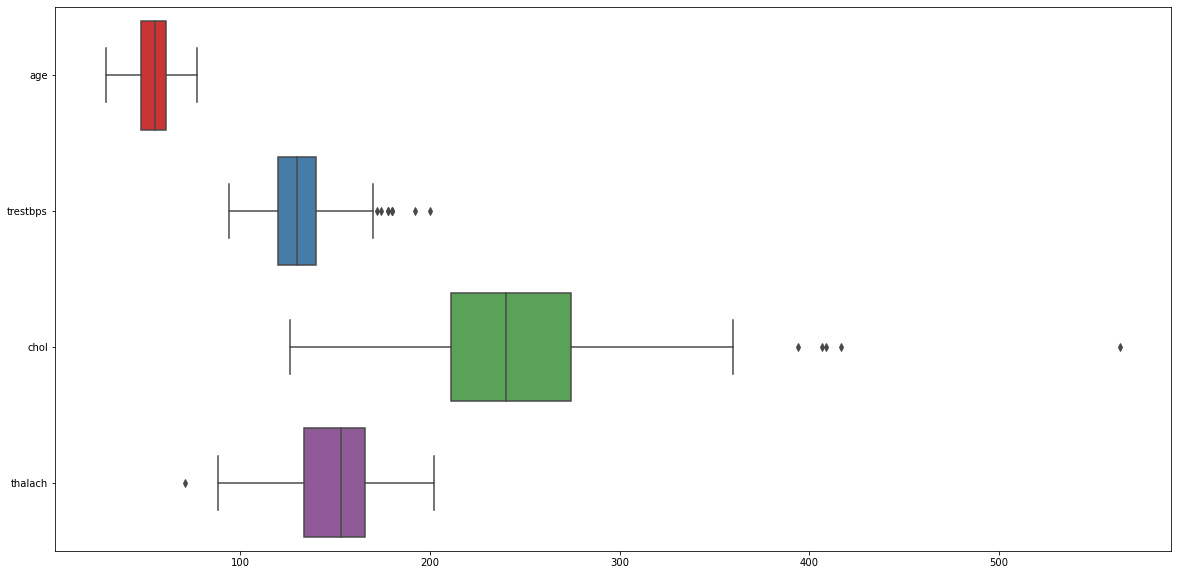

In [10]:
# Create boxplot for each feature with range between 10s and 100s

plt.figure(figsize=(20,10))
ax1 = sns.boxplot(data=heartbox1, orient="h", palette="Set1")

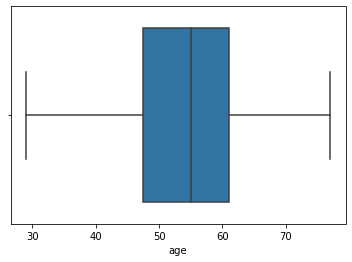

In [11]:
# Get closer look at age 
ax1a = sns.boxplot(x=heart["age"])

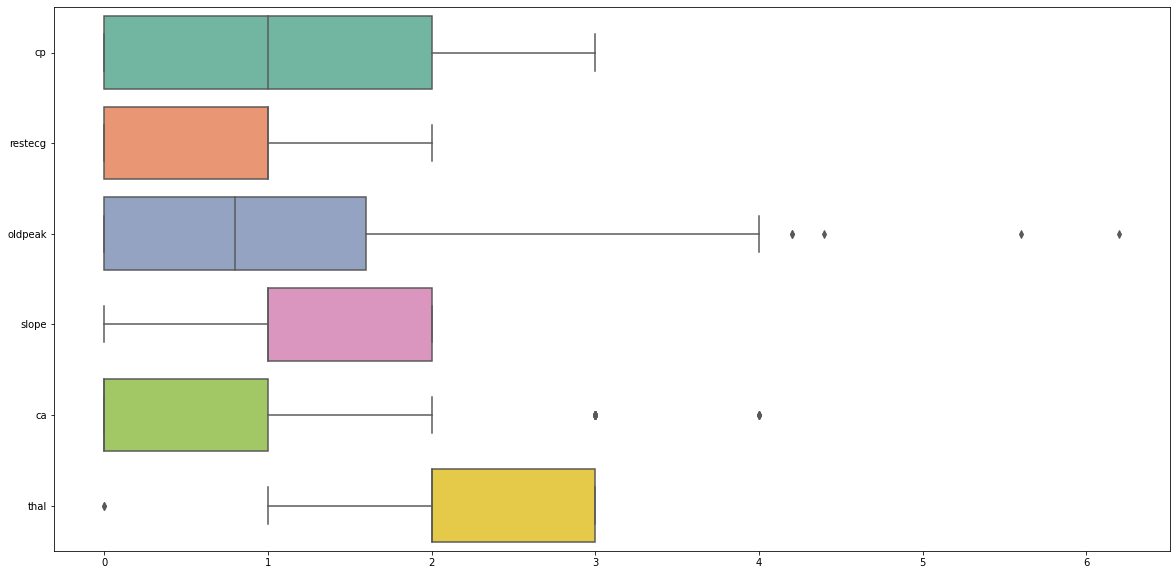

In [12]:
# Create boxplot for each feature with range between 0 and less than 10
plt.figure(figsize=(20,10))
ax2 = sns.boxplot(data=heartbox2, orient="h", palette="Set2")

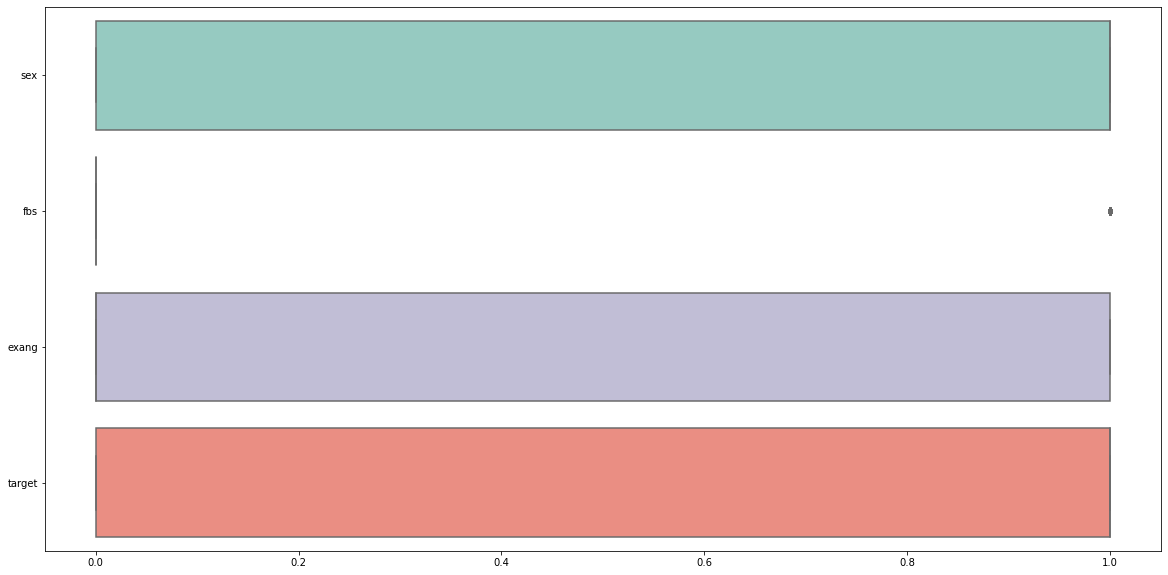

In [13]:
# Create boxplot for each feature with range between 0 and 1
plt.figure(figsize=(20,10))
ax3 = sns.boxplot(data=heartbox3, orient="h", palette="Set3")

**Features with Outliers** 
- trestbps (high values)
- chol (high values)
- thalach (low value)
- oldpeak (high values)
- ca (high values)
- thal (low value)
- fbs (high value)

**Features with skews**
- cp (left-skew)
- restecg (left-skew)
- oldpeak (left-skew)
- slope (right-skew)
- ca (left-skew)
- thal (right-skew)

Given the high presence of outliers, MinMaxScaler will not be an appropriate normalisation technique to adopt for this dataset. RobustScaler will be implemented initially as it appears to be the most robust to outliers (compared to MinMaxScaler, Normalization, and StandardScaler). Below is information on the Robust Scaler technique [see scikit-learn's][https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler] guide on RobustScaler for more information. 

- Scale features using statistics that are robust to outliers.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.
- Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often  influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

## Data Preprocessing

In [18]:
# Apply the RobustScaler

Rscaler = RobustScaler(quantile_range=(25,75))
Rscaled_heart = Rscaler.fit_transform(heart)

In [20]:
print('The means after using RobustScaler for heart is: ', Rscaled_heart.mean(axis=0))
print('The standard deviations after using RobustScaler for heart is: ', Rscaled_heart.std(axis=0))

The means after using RobustScaler for heart is:  [-0.04693803 -0.31683168 -0.01650165  0.08118812  0.09864609  0.14851485
 -0.47194719 -0.10317339  0.32673267  0.14975248  0.39933993  0.72937294
  0.31353135 -0.45544554]
The standard deviations after using RobustScaler for heart is:  [0.67163716 0.46524119 0.51517401 0.8754589  0.81488427 0.3556096
 0.52499112 0.70361023 0.46901859 0.72447342 0.61520843 1.0209175
 0.61126531 0.49801094]


In [25]:
print('The means before using RobustScaler for heart is: \n', heart.mean(axis=0))
print('The standard deviations before using RobustScaler for heart is: \n', heart.std(axis=0))

The means before using RobustScaler for heart is: 
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64
The standard deviations before using RobustScaler for heart is: 
 age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64


In [24]:
compare = {'Old Mean':[54.366337, 0.683168, 0.966997, 131.623762, 246.264026, 0.148515, 0.528053, 149.646865, 0.326733, 1.039604, 1.399340, 0.729373, 2.313531, 0.544554], 
'New Mean':[-0.04693803, -0.31683168, -0.01650165,  0.08118812,  0.09864609,  0.14851485, -0.47194719, -0.10317339,  0.32673267,  0.14975248,  0.39933993, 0.72937294, 0.31353135, -0.45544554], 
'Old Std Dev':[9.082101, 0.466011, 1.032052, 17.538143, 51.830751, 0.356198, 0.525860, 22.905161, 0.469794, 1.161075, 0.616226, 1.022606, 0.612277, 0.498835], 
'New Std Dev':[0.67163716, 0.46524119, 0.51517401, 0.8754589,  0.81488427, 0.3556096, 0.52499112, 0.70361023, 0.46901859, 0.72447342, 0.61520843, 1.0209175, 0.61126531, 0.49801094]}

compare_df = pd.DataFrame(data=compare)
compare_df

,Old Mean,New Mean,Old Std Dev,New Std Dev
0,54.366337,-0.046938,9.082101,0.671637
1,0.683168,-0.316832,0.466011,0.465241
2,0.966997,-0.016502,1.032052,0.515174
3,131.623762,0.081188,17.538143,0.875459
4,246.264026,0.098646,51.830751,0.814884
5,0.148515,0.148515,0.356198,0.355610
6,0.528053,-0.471947,0.525860,0.524991
7,149.646865,-0.103173,22.905161,0.703610
8,0.326733,0.326733,0.469794,0.469019
9,1.039604,0.149752,1.161075,0.724473


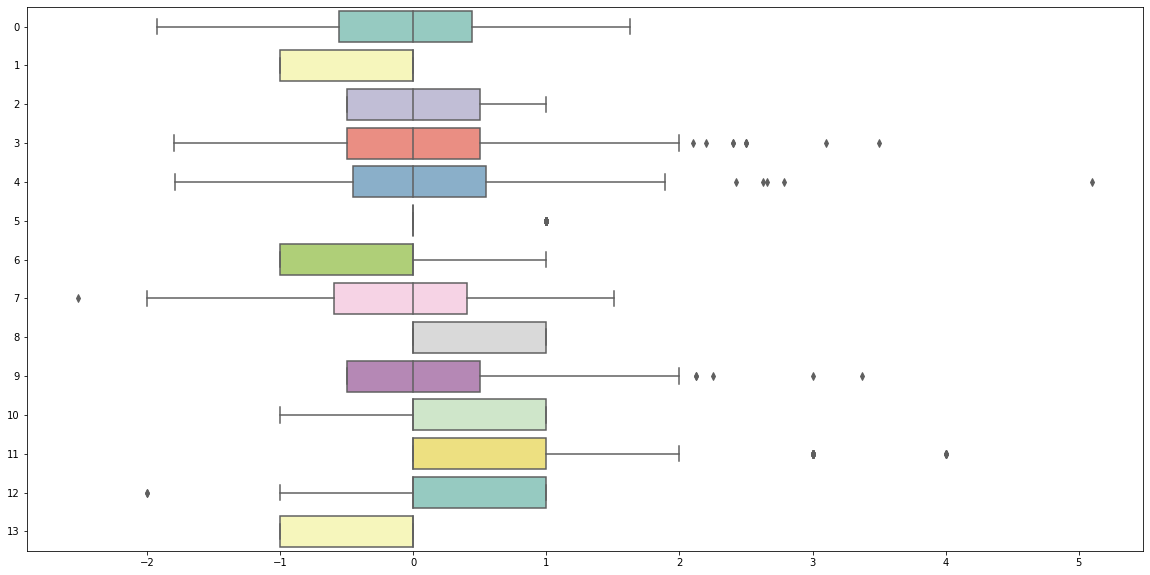

In [27]:
# Plot boxplot for RobustScaler version of heart data to demonstrate that all data is within similar ranges of each other and have maintained individual range integrity.
plt.figure(figsize=(20,10))
ax4 = sns.boxplot(data=Rscaled_heart, orient="h", palette="Set3")

**Did it Work? Overview of RobustScaler Impact**
The table below demonstrates that the existence of outliers and skews for each feature have not changed at all since using RobustScaler.

*Before vs After: Features with Outliers, Features with skew* 

|                      |Outliers Before|Outliers After|Skew Before|Skew After|
|----------------------|---------------|--------------|-----------|----------|
|age                   | NO            | NO           | NO        | NO       |
|sex                   | NO            | NO           | NO        | NO       |
|cp                    | NO            | NO           | LEFT      | LEFT     |
|trestbps              | YES           | YES          | NO        | NO       |
|chol                  | YES           | YES          | NO        | NO       |
|fbs                   | YES           | YES          | NO        | NO       |
|restecg               | NO            | NO           | LEFT      | LEFT     |
|thalach               | YES           | YES          | NO        | NO       |
|exang                 | NO            | NO           | NO        | NO       |
|oldpeak               | YES           | YES          | LEFT      | LEFT     |
|slope                 | NO            | NO           | RIGHT     | RIGHT    |
|ca                    | YES           | YES          | LEFT      | LEFT     |
|thal                  | YES           | YES          | RIGHT     | RIGHT    |
|target                | NO            | NO           | NO        | NO       |

- All unique feature data now falls within a range of **-2** and **5**.
- Outliers will not be removed from this data as the high presence of them in certain features implies a need for further exploration. More importantly as the data is for predicting heart disease, it is not recommended to simply drop inconvenient data when it could be providing valuable insight.  
